In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
df_exotic = pd.read_csv('../src/IRIS_DMC_esecEventsDb.txt', sep = '|')
df_exotic.head()

,areaSource,areaSourceHigh,areaSourceLow,areaTotal,associationId,datlocation,depth,endtime,eventid,h,...,toeLat,toeLon,topLat,topLon,upstreamDrainarea,type,subtype,volume,volumeHigh,volumeLow
0,NaN,NaN,NaN,NaN,22,IRIS,NaN,2007_07_25 010251,22,1860.0,...,61.14054,-140.25324,61.10249,-140.30550,NaN,rock and ice avalanche,Rock/ice/debris avalanches and slides,54000000.0,80500000.0,27500000.0
1,100000.0,NaN,NaN,1600000.0,273,IRIS,NaN,2017_06_23 214249,273,1200.0,...,NaN,NaN,NaN,NaN,NaN,"rock slide, rock avalanche",Rock/ice/debris avalanches and slides,13000000.0,14000000.0,12000000.0
2,NaN,NaN,NaN,NaN,218,"RESIF, ETH, ORFEUS, LMU, BGR, IRIS, INGV",NaN,2017_08_23 093828,218,NaN,...,NaN,NaN,NaN,NaN,NaN,landslide,Rock/ice/debris avalanches and slides,NaN,NaN,NaN
3,111000.0,NaN,NaN,1130000.0,127,IRIS,NaN,2017_07_22 205957,127,931.0,...,60.06616,-139.90755,60.07385,-139.84532,NaN,rock avalanche,Rock/ice/debris avalanches and slides,3000000.0,4000000.0,2300000.0
4,NaN,NaN,NaN,10000000.0,285,IRIS,NaN,1997_12_26 070719,285,NaN,...,16.67530,-62.17620,16.70900,-62.17620,NaN,"debris avalanche, pyroclastic density current",Rock/ice/debris avalanches and slides,46000000.0,50000000.0,40000000.0


## Visualizing the source distribution

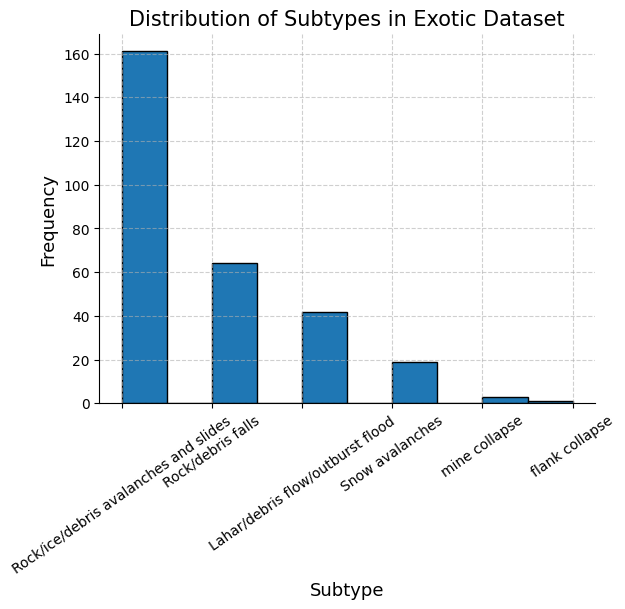

In [69]:
import matplotlib.pyplot as plt

# Your data
data = df_exotic['subtype']

# Create figure and axis
fig, ax = plt.subplots()

# Create histogram
ax.hist(data, bins=10, edgecolor='black')

# Set title and labels
ax.set_title('Distribution of Subtypes in Exotic Dataset', fontsize=15)
ax.set_xlabel('Subtype', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show grid
ax.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation = 35)

# Show the plot
plt.show()

## Distribution of the assigned source types

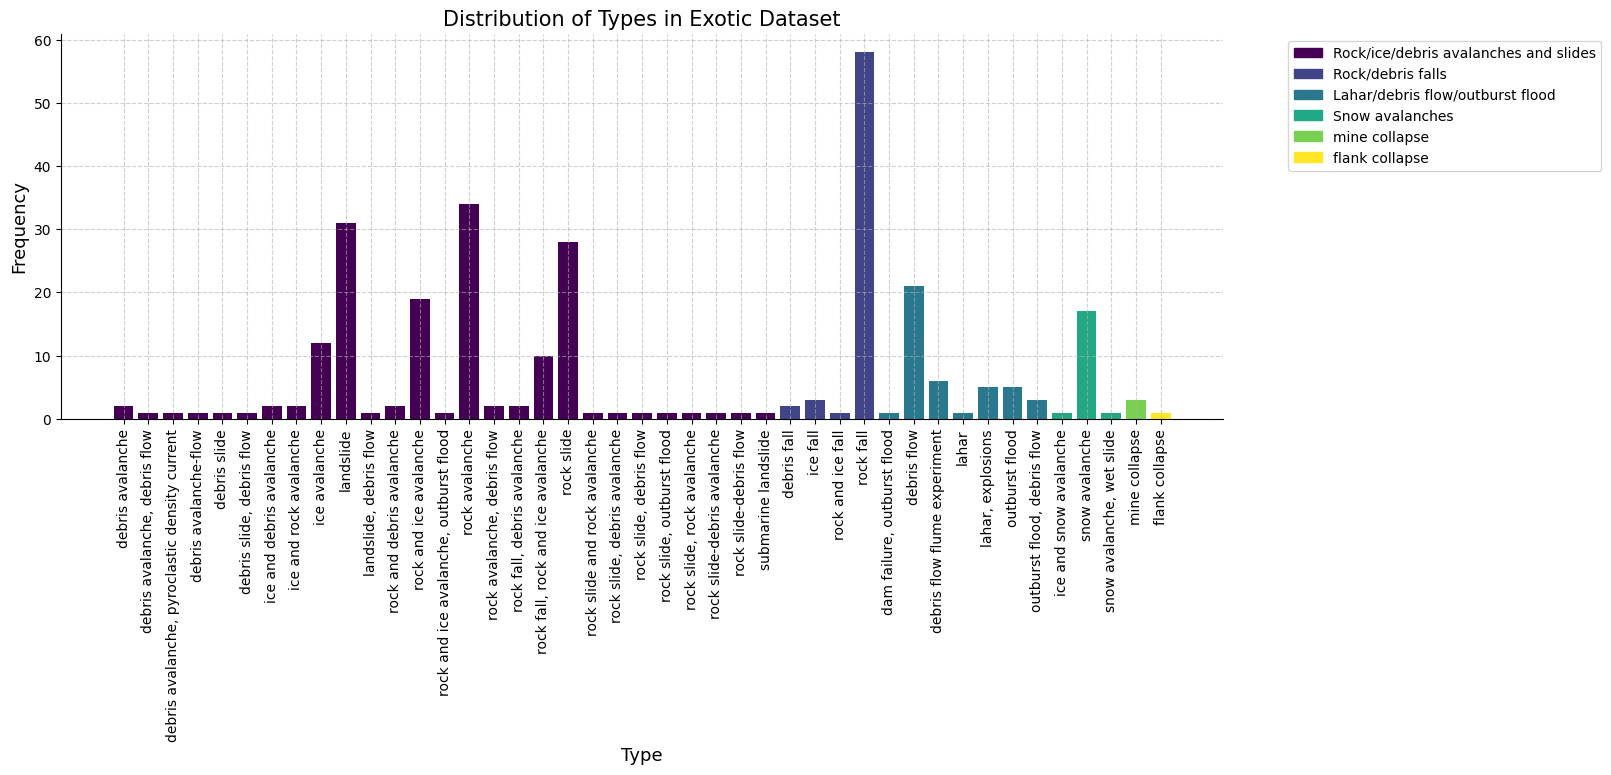

In [70]:
# Create a DataFrame with counts of each combination of 'type' and 'subtype'
df_counts = df_exotic.groupby(['type', 'subtype']).size().reset_index(name='counts')

# Create figure and axis
fig, ax = plt.subplots(figsize  = [15, 5])

# Create a list of colors (one for each subtype)
colors = plt.cm.get_cmap('viridis', len(df_exotic['subtype'].unique()))

# Create a list to store legend patches
legend_patches = []

# For each subtype, create a bar in the histogram
for i, subtype in enumerate(df_exotic['subtype'].unique()):
    df_subtype = df_counts[df_counts['subtype'] == subtype]
    ax.bar(df_subtype['type'], df_subtype['counts'], color=colors(i), width=0.8)
    legend_patches.append(mpatches.Patch(color=colors(i), label=subtype))

# Set title and labels
ax.set_title('Distribution of Types in Exotic Dataset', fontsize=15)
ax.set_xlabel('Type', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show grid
ax.grid(True, linestyle='--', alpha=0.6)

# Add legend
ax.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

## Plotting the temporal distribution

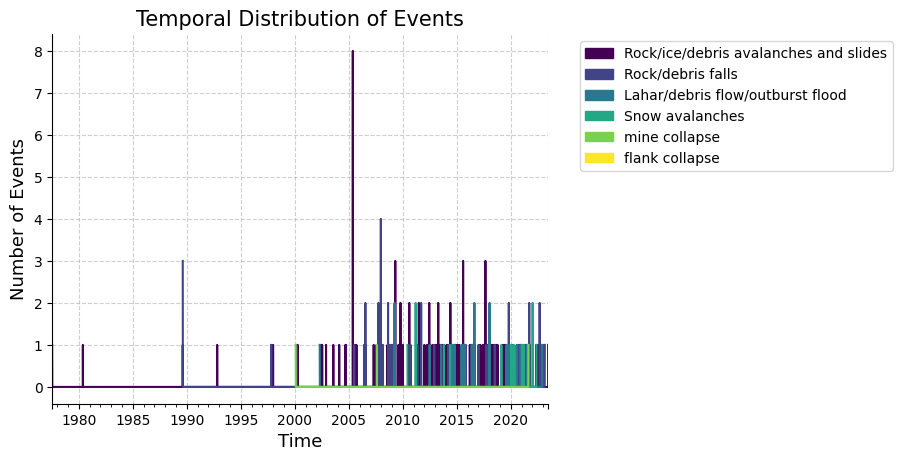

In [73]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Convert 'starttime' to datetime format
df_exotic['starttime'] = pd.to_datetime(df_exotic['starttime'], format='%Y_%m_%d %H%M%S')

starttimes = df_exotic['starttime'].values
# Set 'starttime' as the DataFrame's index
df_exotic = df_exotic.set_index('starttime', inplace=False)
df_exotic['starttime'] = starttimes

# Create figure and axis
fig, ax = plt.subplots()

# Create a list of colors (one for each subtype)
colors = plt.cm.get_cmap('viridis', len(df_exotic['subtype'].unique()))

# Create a list to store legend patches
legend_patches = []

# For each subtype, resample the data by day, count the number of events, and plot
for i, subtype in enumerate(df_exotic['subtype'].unique()):
    df_subtype = df_exotic[df_exotic['subtype'] == subtype]
    df_daily = df_subtype.resample('D').size()
    df_daily.plot(ax=ax, color=colors(i))
    legend_patches.append(mpatches.Patch(color=colors(i), label=subtype))

# Set title and labels
ax.set_title('Temporal Distribution of Events', fontsize=15)
ax.set_xlabel('Time', fontsize=13)
ax.set_ylabel('Number of Events', fontsize=13)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show grid
ax.grid(True, linestyle='--', alpha=0.6)

# Add legend
ax.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

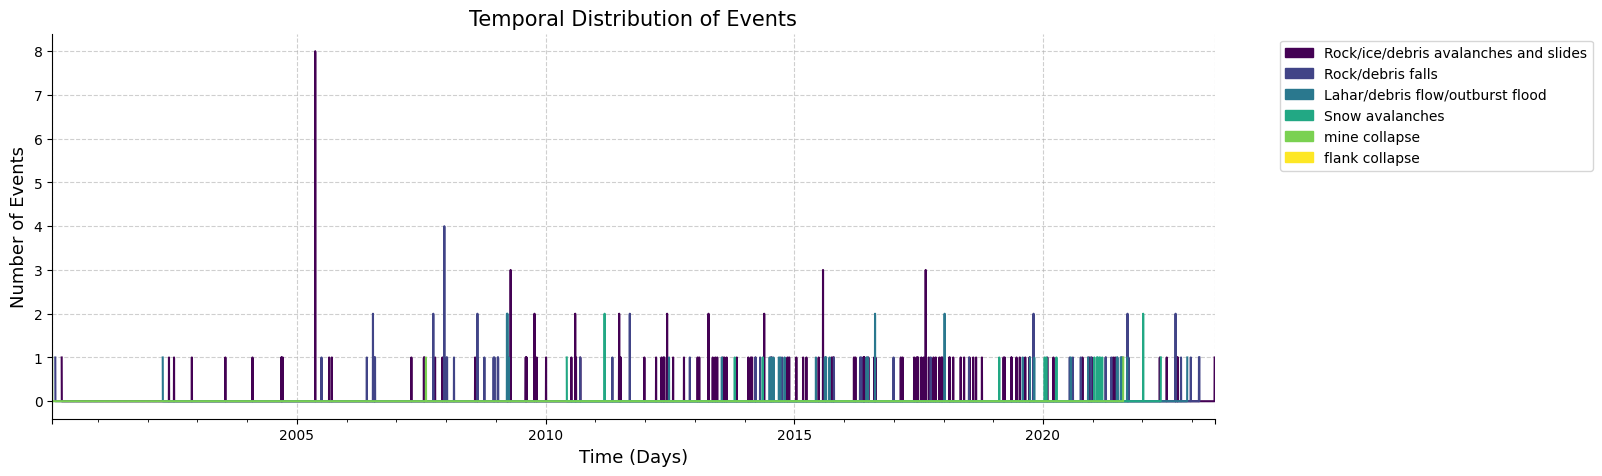

In [79]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Convert 'starttime' to datetime format
df_exotic['starttime'] = pd.to_datetime(df_exotic['starttime'], format='%Y_%m_%d %H%M%S')

# Filter data between 2000 and 2024
start_date = pd.Timestamp(year=1990, month=1, day=1)
end_date = pd.Timestamp(year=2024, month=12, day=31)
df_exotic = df_exotic[(df_exotic['starttime'] >= start_date) & (df_exotic['starttime'] <= end_date)]

starttimes = df_exotic['starttime'].values
# Set 'starttime' as the DataFrame's index
df_exotic = df_exotic.set_index('starttime', inplace=False)
df_exotic['starttime'] = starttimes

# Create figure and axis
fig, ax = plt.subplots(figsize = [15, 5])

# Create a list of colors (one for each subtype)
colors = plt.cm.get_cmap('viridis', len(df_exotic['subtype'].unique()))

# Create a list to store legend patches
legend_patches = []

# For each subtype, resample the data by day, count the number of events, and plot
for i, subtype in enumerate(df_exotic['subtype'].unique()):
    df_subtype = df_exotic[df_exotic['subtype'] == subtype]
    df_daily = df_subtype.resample('D').size()
    df_daily.plot(ax=ax, color=colors(i))
    legend_patches.append(mpatches.Patch(color=colors(i), label=subtype))

# Set title and labels
ax.set_title('Temporal Distribution of Events', fontsize=15)
ax.set_xlabel('Time (Days)', fontsize=13)
ax.set_ylabel('Number of Events', fontsize=13)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show grid
ax.grid(True, linestyle='--', alpha=0.6)

# Add legend
ax.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

## Plotting Spatial Distribution of the Events

In [124]:
import folium
from branca.element import Template, MacroElement

# Create a Map instance
m = folium.Map(location=[df_exotic['latitude'].mean(), df_exotic['longitude'].mean()], zoom_start=2)

# Create a color dictionary
colors = {'Rock/ice/debris avalanches and slides': 'red', 'Rock/debris falls': 'blue', 'Lahar/debris flow/outburst flood': 'green',
         'Snow avalanches':'pink', 'mine collapse':'lightgreen' , 'flank collapse':'black'}

# Add points to the map
for idx, row in df_exotic.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  icon=folium.Icon(color=colors[row['subtype']])).add_to(m)

# Create a legend
template = """
{% macro html(this, kwargs) %}
<div style="
    position: fixed; 
    bottom: 50px;
    left: 50px;
    width: 200px;
    height: 150px; 
    z-index:9999;
    font-size:14px;
    ">
    <p><a style="color:#ff0000;font-size:150%;">&#9679;</a>&nbsp;Rock/ice/debris avalanches and slides</p>
    <p><a style="color:#0000ff;font-size:150%;">&#9679;</a>&nbsp;Rock/debris falls</p>
    <p><a style="color:#008000;font-size:150%;">&#9679;</a>&nbsp;Lahar/debris flow/outburst flood</p>
    <p><a style="color:#FFC0CB;font-size:150%;">&#9679;</a>&nbsp;Snow avalanches</p>
    <p><a style="color:#90EE90;font-size:150%;">&#9679;</a>&nbsp;mine collapse</p>
    <p><a style="color:#000000;font-size:150%;">&#9679;</a>&nbsp;flank collapse</p>
</div>
<div style="
    position: fixed; 
    bottom: 10px;
    left: 10px;
    width: 250px;
    height: 200px; 
    z-index:9998;
    font-size:14px;
    background-color: #ffffff;
    opacity: 0.7;
    ">
</div>
{% endmacro %}
"""

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)

# Show the map
m

## Plotting distribution of durations

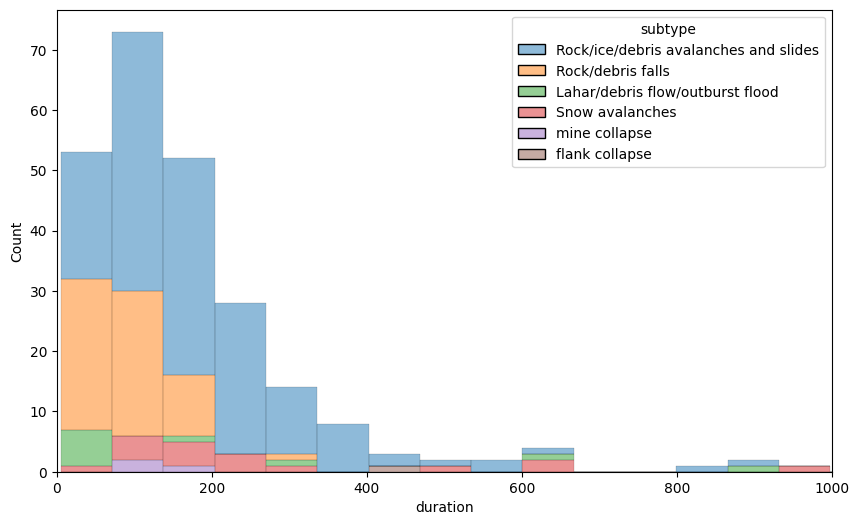

In [126]:
df_exotic['endtime'] = pd.to_datetime(df_exotic['endtime'], format='%Y_%m_%d %H%M%S')
# Compute the difference in seconds
df_exotic['duration'] = (df_exotic['endtime'] - df_exotic['starttime']).dt.total_seconds()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=df_exotic, x="duration", hue="subtype", multiple="stack", alpha = 0.5)
plt.xlim(0,1000)
plt.show()